In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
uploaded = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv


In [3]:
#Load and read the dataset
df_movies = pd.read_csv('imdb_top_1000.csv')
df_movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
#Check the shape
df_movies.shape

(1000, 16)

In [5]:
df_movies.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [6]:
#data preprocessing
df_movies.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [7]:
def gen_null_count_per(data):
  nv=data.isnull().sum()
  nv = nv[nv>0]
  nv_df = pd.DataFrame({'Feature':nv.index,'Count':nv.values,
                       'Percent_Null':(nv.values/df_movies.shape[0]*100)})
  return nv_df

In [8]:
gen_null_count_per(df_movies)

,Feature,Count,Percent_Null
0,Certificate,101,10.1
1,Meta_score,157,15.7
2,Gross,169,16.9


In [9]:
df_movies.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [10]:
df_movies['Certificate'].value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [11]:
df_movies['Certificate'].fillna(df_movies['Certificate'].mode()[0],inplace= True)

In [12]:
gen_null_count_per(df_movies)

,Feature,Count,Percent_Null
0,Meta_score,157,15.7
1,Gross,169,16.9


In [13]:
df_movies.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [14]:
df_movies['Meta_score'].fillna(df_movies['Meta_score'].median(),inplace=True)

In [15]:
gen_null_count_per(df_movies)

,Feature,Count,Percent_Null
0,Gross,169,16.9


In [16]:
df_movies.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [17]:
df_movies['Gross']=df_movies['Gross'].str.replace(',','')


In [18]:
df_movies['Gross'].head()

0     28341469
1    134966411
2    534858444
3     57300000
4      4360000
Name: Gross, dtype: object

In [19]:
df_movies['Gross']=pd.to_numeric(df_movies['Gross'])

In [20]:
df_movies.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [21]:
df_movies['Gross'].fillna(df_movies['Gross'].median(),inplace=True)
gen_null_count_per(df_movies)

,Feature,Count,Percent_Null


In [22]:
df_movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [23]:
df_movies['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

In [24]:
df_movies['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [25]:
df_movies[df_movies['Released_Year']=='PG'].shape

(1, 16)

In [26]:
df_movies=df_movies[df_movies['Released_Year']!='PG']
df_movies.shape

(999, 16)

In [27]:
df_movies['Released_Year']=pd.to_numeric(df_movies['Released_Year'])

<ipython-input-27-547baaeffc95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['Released_Year']=pd.to_numeric(df_movies['Released_Year'])


In [28]:
df_movies.dtypes

Poster_Link       object
Series_Title      object
Released_Year      int64
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [29]:
#Separate the Continuous and categorical feature
num_cols=df_movies.dtypes[df_movies.dtypes!='object'].index
cat_cols=df_movies.dtypes[df_movies.dtypes==object].index
print(num_cols)
print(cat_cols)

Index(['Released_Year', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross'], dtype='object')
Index(['Poster_Link', 'Series_Title', 'Certificate', 'Runtime', 'Genre',
       'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4'],
      dtype='object')


In [30]:
df_movies.duplicated().sum()

0

In [31]:
#EDA

#### Plot Top N most frequent genres on a bar chart in IMDB top 1000 dataset

In [32]:
def topN_most_freq_genre(N,col):
    s = df_movies['Genre'].value_counts().sort_values(ascending=False).head(N)
    plt.barh(s.index,s.values,color=col,edgecolor='black')
    plt.title(f'Top {N} most frequent genres in IMDB dataset')
    plt.ylabel('Genres')
    plt.xlabel('Count')
    plt.show()

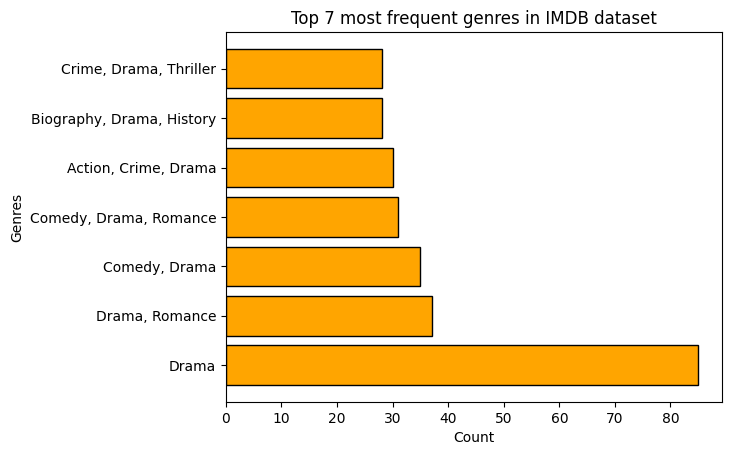

In [33]:
topN_most_freq_genre(7,'orange')

#### 2) Plot Top 5 movies with most votes on a line chart

In [34]:
a1=df_movies[['Series_Title','No_of_Votes']].sort_values('No_of_Votes',ascending=False).head()

In [35]:
a1

,Series_Title,No_of_Votes
0,The Shawshank Redemption,2343110
2,The Dark Knight,2303232
8,Inception,2067042
9,Fight Club,1854740
6,Pulp Fiction,1826188


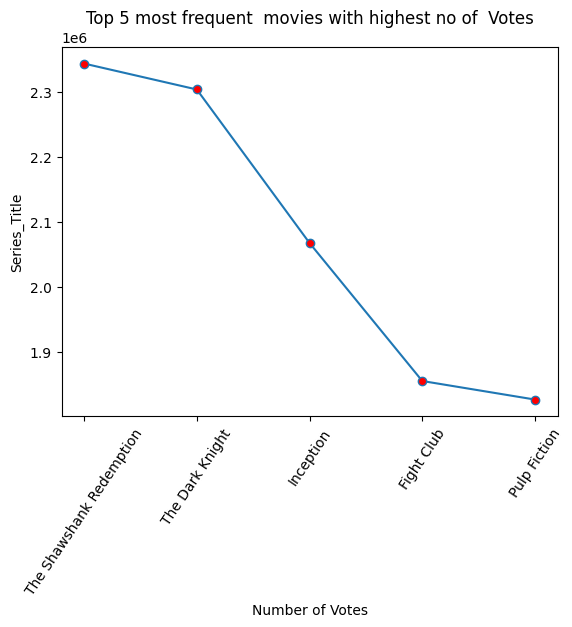

In [36]:
plt.plot(a1['Series_Title'],a1['No_of_Votes'],marker='o',mfc='red')
plt.title("Top 5 most frequent  movies with highest no of  Votes")
plt.xlabel('Number of Votes')
plt.ylabel('Series_Title')
plt.xticks(rotation=56)
plt.show()

#### 3) Visualize the relationship between the number of votes and Gross revenue

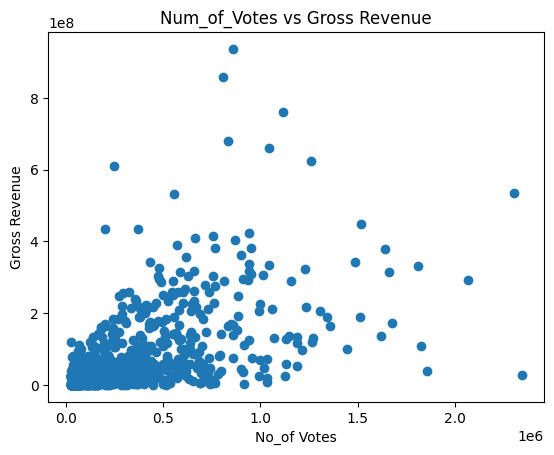

In [37]:
plt.scatter(df_movies['No_of_Votes'],df_movies['Gross'])
plt.title('Num_of_Votes vs Gross Revenue')
plt.xlabel('No_of Votes')
plt.ylabel('Gross Revenue')
plt.show()

In [38]:
df_movies['Runtime'].head()

0    142 min
1    175 min
2    152 min
3    202 min
4     96 min
Name: Runtime, dtype: object

In [39]:
df_movies['Runtime1']=df_movies['Runtime'].str.replace('min','')
df_movies['Runtime1']=pd.to_numeric(df_movies['Runtime1'])

In [40]:
df_movies.dtypes

Poster_Link       object
Series_Title      object
Released_Year      int64
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
Runtime1           int64
dtype: object

In [41]:
df_movies['Runtime(hr)'] = round(df_movies['Runtime1']/60,2)
df_movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime1,Runtime(hr)
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,142,2.37
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,175,2.92
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,152,2.53
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,202,3.37
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,96,1.60


#### 5) For the top 3 Genres, Depict top N directors for each Genre with highest Gross Revenue on bar chart

In [42]:
df_movies['Genre'].value_counts()

Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: Genre, Length: 202, dtype: int64

In [43]:
b=df_movies[df_movies['Genre'].isin(['Drama','Drama, Romance','Comedy, Drama'])]

In [44]:
b.shape

(157, 18)

In [45]:
x=b[b['Genre']=='Drama']
x1=x[['Director','Gross']].sort_values('Gross',ascending=False).head()

In [46]:
x1

,Director,Gross
404,Barry Levinson,178800000.0
347,Tate Taylor,169708112.0
225,Clint Eastwood,148095302.0
98,Sam Mendes,130096601.0
981,Mark Rydell,119285432.0


In [48]:
def topN_directors_with_highest_Gross(N):
    b1 = b[b['Genre']=='Drama']
    b1res = b1[['Director','Gross']].sort_values('Gross',ascending=False).head(N)
    b2 = b[b['Genre']=='Drama, Romance']
    b2res = b2[['Director','Gross']].sort_values('Gross',ascending=False).head(N)
    b3 =b[b['Genre']=='Comedy, Drama']
    b3res = b3[['Director','Gross']].sort_values('Gross',ascending=False).head(N)
    fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(6,15))

    ax1.bar(b1res['Director'],b1res['Gross'],color='orange',edgecolor='black')
    ax1.set_title(f'Top {N} directors with highest Gross Rev in Drama Genre')

    ax2.bar(b2res['Director'],b2res['Gross'],color='lightgreen',edgecolor='black')
    ax2.set_title(f'Top {N} directors with highest Gross Rev in Drama, Romance Genre')

    ax3.bar(b3res['Director'],b3res['Gross'],color='blue',edgecolor='black')
    ax3.set_title(f'Top {N} directors with highest Gross Rev in Comedy, Drama Genre')

    plt.show()

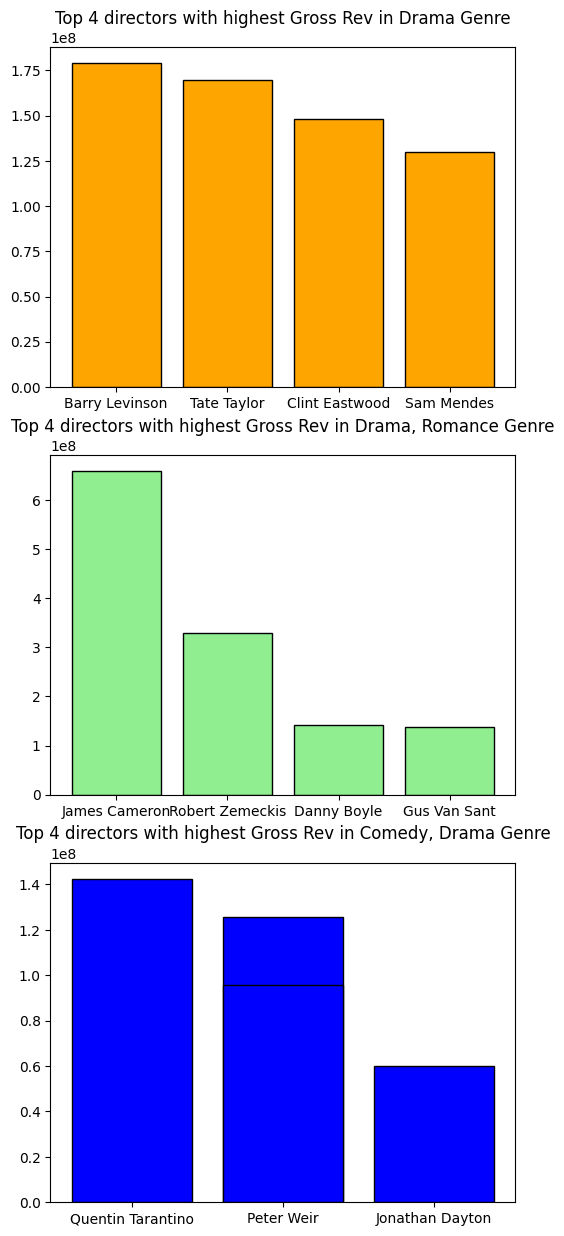

In [50]:
topN_directors_with_highest_Gross(4)